In [1]:
!pip install yfinance
!pip install bs4

Using legacy 'setup.py install' for bs4, since package 'wheel' is not installed.
    Running setup.py install for bs4: started
    Running setup.py install for bs4: finished with status 'done'


## Question 1: Use yfinance to Extract Stock Data


In [2]:
import yfinance as yf

In [3]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [10]:
tesla_stock_data = tesla.history(period="max")

In [5]:
tesla_stock_data.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [11]:
tesla_stock_data.reset_index(inplace=True)
tesla_stock_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


In [13]:
from bs4 import BeautifulSoup
import requests

In [19]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
page = requests.get(url).text
soup = BeautifulSoup(page, 'html.parser')

In [28]:
soup.find_all('th')

[<th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>,
 <th colspan="2" style="text-align:center">Tesla Quarterly Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>,
 <th style="text-align:center">Sector</th>,
 <th style="text-align:center">Industry</th>,
 <th style="text-align:center">Market Cap</th>,
 <th style="text-align:center">Revenue</th>,
 <th style="text-align:center; width:40%;">Stock Name</th>,
 <th style="text-align:center; width:20%;">Country</th>,
 <th style="text-align:center; width:20%;">Market Cap</th>,
 <th style="text-align:center; width:20%;">PE Ratio</th>,
 <th>Link Preview</th>,
 <th>HTML Code (Click to Copy)</th>,
 <th>Link Preview</th>,
 <th>HTML Code (Click to Copy)</th>]

In [91]:
annual_revenue_table = soup.find_all('table')[0]

In [92]:
# put the Tesla Quarterly Revenue table into a DataFrame
import pandas as pd
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

if("Tesla Annual Revenue" in str(annual_revenue_table)):
    for row in annual_revenue_table.tbody.find_all('tr'):
        col = row.find_all('td')
        date = col[0].text        
        revenue = col[1].text   
        
        tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

tesla_revenue        

,Date,Revenue
0,2020,"$31,536"
1,2019,"$24,578"
2,2018,"$21,461"
3,2017,"$11,759"
4,2016,"$7,000"
5,2015,"$4,046"
6,2014,"$3,198"
7,2013,"$2,013"
8,2012,$413
9,2011,$204


In [93]:
# Cleaning of the Tesla Quarterly Revenue DataFrame 
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"") # removing commas and $ signs
tesla_revenue.dropna(inplace=True)
#tesla_revenue =  tesla_revenue[tesla_revenue["Revenue"] != ""]

<ipython-input-93-08f1f0d19e47>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"") # removing commas and $ signs


In [94]:
tesla_revenue.head(5)

,Date,Revenue
0,2020,31536
1,2019,24578
2,2018,21461
3,2017,11759
4,2016,7000


In [95]:
tesla_revenue.tail(5)

,Date,Revenue
8,2012,413
9,2011,204
10,2010,117
11,2009,112
12,2008,15


In [96]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Date'>

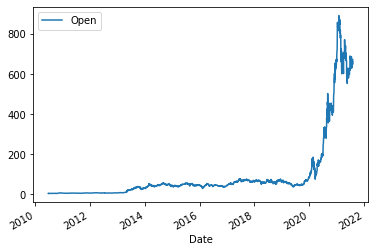

In [97]:
tesla_stock_data.plot(x="Date", y="Open") # plotting using the dataframe's plot() function

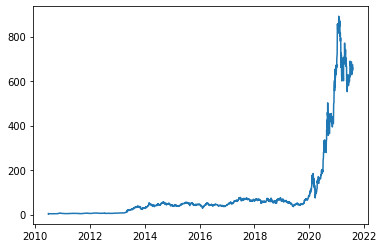

In [98]:
plt.plot(tesla_stock_data["Date"], tesla_stock_data["Open"]) # plotting using matplotlib.pyplot

In [101]:
tesla_revenue = tesla_revenue.sort_values("Date",ascending=True)
sorted(tesla_revenue["Date"])

,Date,Revenue
12,2008,15
11,2009,112
10,2010,117
9,2011,204
8,2012,413
7,2013,2013
6,2014,3198
5,2015,4046
4,2016,7000
3,2017,11759


list

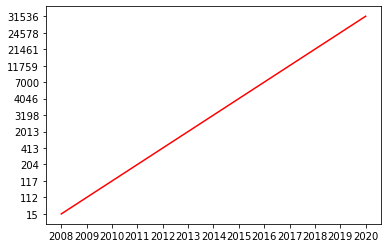

In [108]:
plt.plot(tesla_revenue["Date"],tesla_revenue["Revenue"],color="red")